# The Business Problem

Pawdacity is a leading pet store chain in Wyoming with 13 stores throughout the state. This year, Pawdacity would like to expand and open a 14th store. Your manager has asked you to perform an analysis to recommend the city for Pawdacity’s newest store, based on predicted yearly sales.

### Available data
* The monthly sales data for all of the Pawdacity stores for the year 2010.
* NAICS data on the most current sales of all competitor stores where total sales is equal to 12 months of sales.
* A partially parsed data file that can be used for population numbers.
* Demographic data (Households with individuals under 18, Land Area, Population Density, and Total Families) for each city and county in the state of Wyoming. For people who are unfamiliar with the US city system, a state contains counties and counties contains one or more cities

### Things to note
- Recommendation is based on *yearly* predicted sales.
- Available data contains monthly sales for 2010.
- we have data for 11 stores and not 13 stores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import warnings

warnings.filterwarnings("ignore")

In [2]:
monthly_sales = pd.read_csv('p2-2010-pawdacity-monthly-sales.csv')
population = pd.read_csv('p2-partially-parsed-wy-web-scrape.csv')
competitors =  pd.read_csv('p2-wy-453910-naics-data.csv')
demographics = pd.read_csv('p2-wy-demographic-data.csv')

In [3]:
monthly_sales.head()

NAME                       ADDRESS      CITY STATE    ZIP  January  \
0  Pawdacity               509 Fort St # A   Buffalo    WY  82834    16200   
1  Pawdacity  601 SE Wyoming Blvd Unit 252    Casper    WY  82609    29160   
2  Pawdacity             3769 E Lincolnway  Cheyenne    WY  82001    79920   
3  Pawdacity             2625 Big Horn Ave      Cody    WY  82414    19440   
4  Pawdacity                  123 S 2nd St   Douglas    WY  82633    16200   

   February  March  April    May   June   July  August  September  October  \
0     13392  14688  17064  18360  14040  12960   19224      15984    13392   
1     21600  27000  27648  29160  27216  25488   25704      22896    25272   
2     70632  79056  77544  73656  77976  73872   77544      78516    74520   
3     15984  19008  18144  16632  17496  18792   20304      19224    18144   
4     13392  14688  17064  18360  14040  12960   19224      15984    29808   

   November  December  
0     13176     16848  
1     28944     27648  
2     74736     79920  
3     18576     16632  
4     17496     18792

In [4]:
population.head()

City|County   2014 Estimate     2010 Census     2000 Census
0       Afton|Lincoln  <td>1,968</td>  <td>1,911</td>  <td>1,818</td>
1       Albin|Laramie    <td>185</td>    <td>181</td>    <td>120</td>
2      Alpine|Lincoln    <td>845</td>    <td>828</td>    <td>550</td>
3        Baggs|Carbon    <td>439</td>    <td>440</td>    <td>348</td>
4  Bairoil|Sweetwater    <td>107</td>    <td>106</td>     <td>97</td>

In [5]:
competitors.head()

BUSINESS NAME PHYSICAL CITY NAME  SALES VOLUME  \
0      Mile High Mobile Pet LLC           Cheyenne        300000   
1                 Pets City Inc           Cheyenne        640000   
2  Petco Animal Sups Stores Inc           Cheyenne             0   
3                    Pet-A-Care           Cheyenne         81000   
4          Muddy Paws Pet Salon            Laramie         76000   

             CASS_LastLine  
0  Cheyenne, WY 82007-3528  
1  Cheyenne, WY 82009-4851  
2  Cheyenne, WY 82009-4945  
3  Cheyenne, WY 82009-1009  
4   Laramie, WY 82070-8979

In [6]:
demographics.head()

City    County    Land Area  Households with Under 18  \
0     Laramie    Albany  2513.745235                      2075   
1  Rock River    Albany   200.444000                       165   
2       Basin  Big Horn   543.951304                       250   
3  Burlington  Big Horn   137.646214                        63   
4       Byron  Big Horn   252.489592                       116   

   Population Density  Total Families  
0                5.19         4668.93  
1                0.41          372.30  
2                0.66          566.43  
3                0.17          143.34  
4                0.31          262.93

In [7]:

print("Data shapes")
print(monthly_sales.shape)
print(population.shape)
print(competitors.shape)
print(demographics.shape)

Data shapes
(11, 17)
(103, 4)
(32, 4)
(99, 6)


# Building the Training Set

- ## Population data
    - **Formatting the data**

In [8]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   City|County    99 non-null     object
 1   2014 Estimate  103 non-null    object
 2   2010 Census    103 non-null    object
 3   2000 Census    103 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [9]:
population[['City', 'County']] = population['City|County'].str.split('|', 1, expand=True)
population.drop(['City|County'], axis=1, inplace=True)
# list(population['City'])
population.head()

2014 Estimate     2010 Census     2000 Census     City      County
0  <td>1,968</td>  <td>1,911</td>  <td>1,818</td>    Afton     Lincoln
1    <td>185</td>    <td>181</td>    <td>120</td>    Albin     Laramie
2    <td>845</td>    <td>828</td>    <td>550</td>   Alpine     Lincoln
3    <td>439</td>    <td>440</td>    <td>348</td>    Baggs      Carbon
4    <td>107</td>    <td>106</td>     <td>97</td>  Bairoil  Sweetwater

In [10]:
population['2014 Estimate'] = population['2014 Estimate'].str.extract(">(\d*\,?\d+)<", expand=True)
population['2010 Census'] = population['2010 Census'].str.extract(">(\d*\,?\d+)<", expand=True)
population['2000 Census'] = population['2000 Census'].str.extract(">(\d*\,?\d+)<", expand=True)
# list(population['City'])
population.head()

2014 Estimate 2010 Census 2000 Census     City      County
0         1,968       1,911       1,818    Afton     Lincoln
1           185         181         120    Albin     Laramie
2           845         828         550   Alpine     Lincoln
3           439         440         348    Baggs      Carbon
4           107         106          97  Bairoil  Sweetwater

- **Clean missing values**

In [11]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text.strip()

population.dropna(how='all', inplace=True)
population["City"] = population['City'].apply(remove_punctuations)
# list(population['City'])
population.tail()

2014 Estimate 2010 Census 2000 Census       City      County
94           503         451         261  Wamsutter  Sweetwater
95         3,659       3,627       3,548  Wheatland      Platte
96         5,366       5,487       5,250    Worland    Washakie
97         1,847       1,807       1,347     Wright    Campbell
98           161         151         169      Yoder      Goshen

In [12]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   2014 Estimate  99 non-null     object
 1   2010 Census    99 non-null     object
 2   2000 Census    98 non-null     object
 3   City           99 non-null     object
 4   County         99 non-null     object
dtypes: object(5)
memory usage: 4.6+ KB


In [13]:
population_2010 = population[['2010 Census', 'City', 'County']]
population_2010['2010 Census'] = population_2010['2010 Census'].iloc[:,].str.replace(',' , '').astype(int)
population_2010.head()

2010 Census     City      County
0         1911    Afton     Lincoln
1          181    Albin     Laramie
2          828   Alpine     Lincoln
3          440    Baggs      Carbon
4          106  Bairoil  Sweetwater

- **Check for duplicates and NaN values**


In [14]:
print(population_2010.duplicated().any())
print(population_2010.isnull().sum())

False
2010 Census    0
City           0
County         0
dtype: int64


## Monthly sales
- Sum the monthly sales

In [15]:
monthly_sales.head()

NAME                       ADDRESS      CITY STATE    ZIP  January  \
0  Pawdacity               509 Fort St # A   Buffalo    WY  82834    16200   
1  Pawdacity  601 SE Wyoming Blvd Unit 252    Casper    WY  82609    29160   
2  Pawdacity             3769 E Lincolnway  Cheyenne    WY  82001    79920   
3  Pawdacity             2625 Big Horn Ave      Cody    WY  82414    19440   
4  Pawdacity                  123 S 2nd St   Douglas    WY  82633    16200   

   February  March  April    May   June   July  August  September  October  \
0     13392  14688  17064  18360  14040  12960   19224      15984    13392   
1     21600  27000  27648  29160  27216  25488   25704      22896    25272   
2     70632  79056  77544  73656  77976  73872   77544      78516    74520   
3     15984  19008  18144  16632  17496  18792   20304      19224    18144   
4     13392  14688  17064  18360  14040  12960   19224      15984    29808   

   November  December  
0     13176     16848  
1     28944     27648  
2     74736     79920  
3     18576     16632  
4     17496     18792

In [16]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NAME       11 non-null     object
 1   ADDRESS    11 non-null     object
 2   CITY       11 non-null     object
 3   STATE      11 non-null     object
 4   ZIP        11 non-null     int64 
 5   January    11 non-null     int64 
 6   February   11 non-null     int64 
 7   March      11 non-null     int64 
 8   April      11 non-null     int64 
 9   May        11 non-null     int64 
 10  June       11 non-null     int64 
 11  July       11 non-null     int64 
 12  August     11 non-null     int64 
 13  September  11 non-null     int64 
 14  October    11 non-null     int64 
 15  November   11 non-null     int64 
 16  December   11 non-null     int64 
dtypes: int64(13), object(4)
memory usage: 1.6+ KB


In [17]:
monthly_sales['2010_total_sales'] = monthly_sales.iloc[:, 5:].sum(axis=1)
monthly_sales = monthly_sales[['NAME',	'ADDRESS',	'CITY', 'STATE', 'ZIP', '2010_total_sales']]
print(monthly_sales.duplicated().any())
print(monthly_sales.isnull().sum())
monthly_sales.head()

False
NAME                0
ADDRESS             0
CITY                0
STATE               0
ZIP                 0
2010_total_sales    0
dtype: int64


NAME                       ADDRESS      CITY STATE    ZIP  \
0  Pawdacity               509 Fort St # A   Buffalo    WY  82834   
1  Pawdacity  601 SE Wyoming Blvd Unit 252    Casper    WY  82609   
2  Pawdacity             3769 E Lincolnway  Cheyenne    WY  82001   
3  Pawdacity             2625 Big Horn Ave      Cody    WY  82414   
4  Pawdacity                  123 S 2nd St   Douglas    WY  82633   

   2010_total_sales  
0            185328  
1            317736  
2            917892  
3            218376  
4            208008

## Demographics

In [18]:
print(demographics.info())
print(demographics.duplicated().any())
print(demographics.isnull().sum())
demographics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   City                      99 non-null     object 
 1   County                    99 non-null     object 
 2   Land Area                 99 non-null     float64
 3   Households with Under 18  99 non-null     int64  
 4   Population Density        99 non-null     float64
 5   Total Families            99 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.8+ KB
None
False
City                        0
County                      0
Land Area                   0
Households with Under 18    0
Population Density          0
Total Families              0
dtype: int64


City    County    Land Area  Households with Under 18  \
0     Laramie    Albany  2513.745235                      2075   
1  Rock River    Albany   200.444000                       165   
2       Basin  Big Horn   543.951304                       250   
3  Burlington  Big Horn   137.646214                        63   
4       Byron  Big Horn   252.489592                       116   

   Population Density  Total Families  
0                5.19         4668.93  
1                0.41          372.30  
2                0.66          566.43  
3                0.17          143.34  
4                0.31          262.93

## Competitors

In [19]:
print(competitors.info())
competitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BUSINESS NAME       32 non-null     object
 1   PHYSICAL CITY NAME  32 non-null     object
 2   SALES VOLUME        32 non-null     int64 
 3   CASS_LastLine       32 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB
None


BUSINESS NAME PHYSICAL CITY NAME  SALES VOLUME  \
0      Mile High Mobile Pet LLC           Cheyenne        300000   
1                 Pets City Inc           Cheyenne        640000   
2  Petco Animal Sups Stores Inc           Cheyenne             0   
3                    Pet-A-Care           Cheyenne         81000   
4          Muddy Paws Pet Salon            Laramie         76000   

             CASS_LastLine  
0  Cheyenne, WY 82007-3528  
1  Cheyenne, WY 82009-4851  
2  Cheyenne, WY 82009-4945  
3  Cheyenne, WY 82009-1009  
4   Laramie, WY 82070-8979

# Merge the data-sets

In [20]:
pop_and_sales = pd.merge(population_2010, monthly_sales, left_on=['City'],right_on=['CITY'])
pop_and_sales.drop('CITY', axis=1, inplace=True)
pop_and_sales

2010 Census          City      County       NAME  \
0          4585       Buffalo     Johnson  Pawdacity   
1         35316        Casper     Natrona  Pawdacity   
2         59466      Cheyenne     Laramie  Pawdacity   
3          9520          Cody        Park  Pawdacity   
4          6120       Douglas    Converse  Pawdacity   
5         12359      Evanston       Uinta  Pawdacity   
6         29087      Gillette    Campbell  Pawdacity   
7          6314        Powell        Park  Pawdacity   
8         10615      Riverton     Fremont  Pawdacity   
9         23036  Rock Springs  Sweetwater  Pawdacity   
10        17444      Sheridan    Sheridan  Pawdacity   

                         ADDRESS STATE    ZIP  2010_total_sales  
0                509 Fort St # A    WY  82834            185328  
1   601 SE Wyoming Blvd Unit 252    WY  82609            317736  
2              3769 E Lincolnway    WY  82001            917892  
3              2625 Big Horn Ave    WY  82414            218376  
4                   123 S 2nd St    WY  82633            208008  
5                    932 Main St    WY  82930            283824  
6               200 E Lakeway Rd    WY  82718            543132  
7                  180 S Bent St    WY  82435            233928  
8                  512 E Main St    WY  82501            303264  
9            2706 Commercial Way    WY  82901            253584  
10     1842 Sugarland Dr Ste 113    WY  82801            308232

In [21]:
demo_pop_sales = pd.merge(pop_and_sales, demographics, on='City')
demo_pop_sales.head()

2010 Census      City  County_x       NAME                       ADDRESS  \
0         4585   Buffalo   Johnson  Pawdacity               509 Fort St # A   
1        35316    Casper   Natrona  Pawdacity  601 SE Wyoming Blvd Unit 252   
2        59466  Cheyenne   Laramie  Pawdacity             3769 E Lincolnway   
3         9520      Cody      Park  Pawdacity             2625 Big Horn Ave   
4         6120   Douglas  Converse  Pawdacity                  123 S 2nd St   

  STATE    ZIP  2010_total_sales  County_y   Land Area  \
0    WY  82834            185328   Johnson  3115.50750   
1    WY  82609            317736   Natrona  3894.30910   
2    WY  82001            917892   Laramie  1500.17840   
3    WY  82414            218376      Park  2998.95696   
4    WY  82633            208008  Converse  1829.46510   

   Households with Under 18  Population Density  Total Families  
0                       746                1.55         1819.50  
1                      7788               11.16         8756.32  
2                      7158               20.34        14612.64  
3                      1403                1.82         3515.62  
4                       832                1.46         1744.08

In [22]:
demo_pop_sales.shape

(11, 13)

In [23]:
demo_pop_sales=demo_pop_sales[['City', '2010 Census', '2010_total_sales', 'Land Area', 'Households with Under 18', 'Population Density', 'Total Families']]
demo_pop_sales.head()

City  2010 Census  2010_total_sales   Land Area  \
0   Buffalo         4585            185328  3115.50750   
1    Casper        35316            317736  3894.30910   
2  Cheyenne        59466            917892  1500.17840   
3      Cody         9520            218376  2998.95696   
4   Douglas         6120            208008  1829.46510   

   Households with Under 18  Population Density  Total Families  
0                       746                1.55         1819.50  
1                      7788               11.16         8756.32  
2                      7158               20.34        14612.64  
3                      1403                1.82         3515.62  
4                       832                1.46         1744.08

In [24]:
demo_pop_sales.sum(axis=0, skipna=True, numeric_only=True)

2010 Census                 2.138620e+05
2010_total_sales            3.773304e+06
Land Area                   3.307138e+04
Households with Under 18    3.406400e+04
Population Density          6.280000e+01
Total Families              6.265279e+04
dtype: float64

## Dealing with Outliers

In [25]:
demo_pop_sales.describe()

2010 Census  2010_total_sales    Land Area  Households with Under 18  \
count     11.000000         11.000000    11.000000                 11.000000   
mean   19442.000000     343027.636364  3006.489126               3096.727273   
std    16616.018584     213538.712215  1617.460342               2453.003061   
min     4585.000000     185328.000000   999.497100                746.000000   
25%     7917.000000     226152.000000  1861.721074               1327.000000   
50%    12359.000000     283824.000000  2748.852900               2646.000000   
75%    26061.500000     312984.000000  3504.908300               4037.000000   
max    59466.000000     917892.000000  6620.201916               7788.000000   

       Population Density  Total Families  
count           11.000000       11.000000  
mean             5.709091     5695.708182  
std              5.849685     3816.049660  
min              1.460000     1744.080000  
25%              1.720000     2923.410000  
50%              2.780000     5556.490000  
75%              7.390000     7380.805000  
max             20.340000    14612.640000

- To get the upper fence: Upper Fence = Q3 + 1.5 IQR
- To get the lower fence: Lower Fence = Q1 - 1.5 IQR
- To get IQR: IQR = Q3 - Q1 = 75th - 25th percentiles

- 2010 Census
    - IQR = 26061.5 - 7917.0 = 18,144.5
    - Upper Fence = 26061.5 + 1.5*18,144.5 = 53,278.25
    - Lower Fence = 7917.0 - 1.5*18,144.5 = -19,299.75
- 2010_total_sales
    - IQR = 312984.0 - 226152.0 = 86,832
    - Upper Fence = 312984.0 + 1.5*86,832 = 443,232
    - Lower Fence = 226152.0 - 1.5*86,832 = 95,904
- Land Area
    - IQR = 3504.908300 - 1861.721074 = 1,643.187226
    - Upper Fence = 3504.908300 + 1.5*1,643.187226 = 5,969.689139
    - Lower Fence = 1861.721074 - 1.5*1,643.187226 = -603.059765
- Households with Under 18
    - IQR = 4037 - 1327 = 2710
    - Upper Fence = 4037 + 1.5*2710 = 8102
    - Lower Fence = 1327 - 1.5*2710 = -2738
- Population density
    - IQR = 7.39 - 1.72 = 5.67
    - Upper Fence = 7.39 + 1.5*5.67 = 15.895
    - Lower Fence = 1.72 - 1.5*5.67 = -6.785
- Total Families
    - IQR = 7380.805000 - 2923.410000 = 4,457.395
    - Upper Fence = 7380.805000 + 1.5*4,457.395 = 14,066.8975
    - Lower Fence = 2923.410000 - 1.5*4,457.395 = -3,762.6825


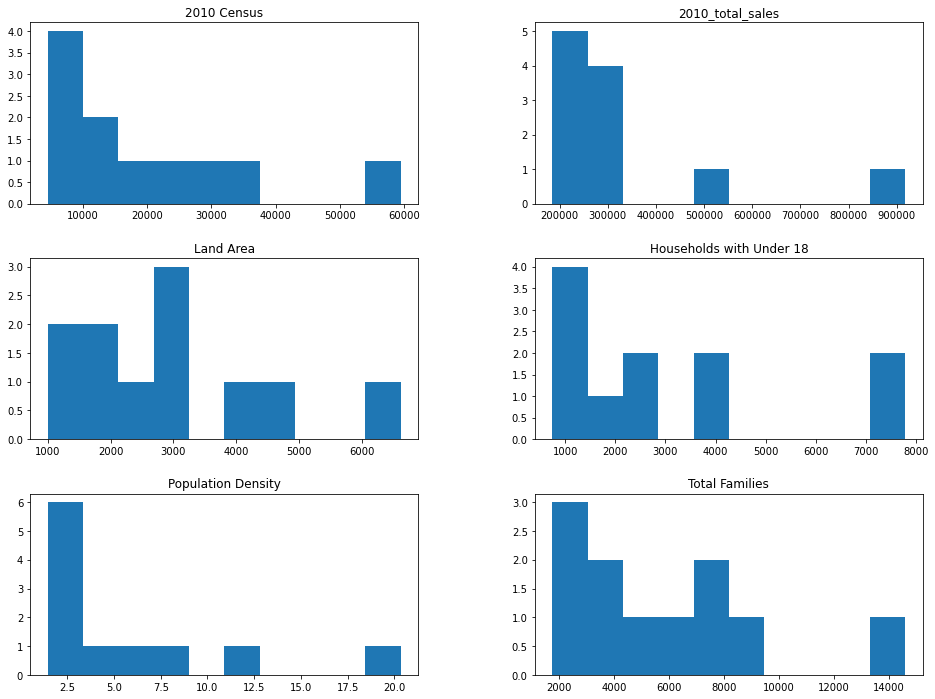

In [26]:
demo_pop_sales.hist(bins=10, figsize=(16, 12), grid=False);

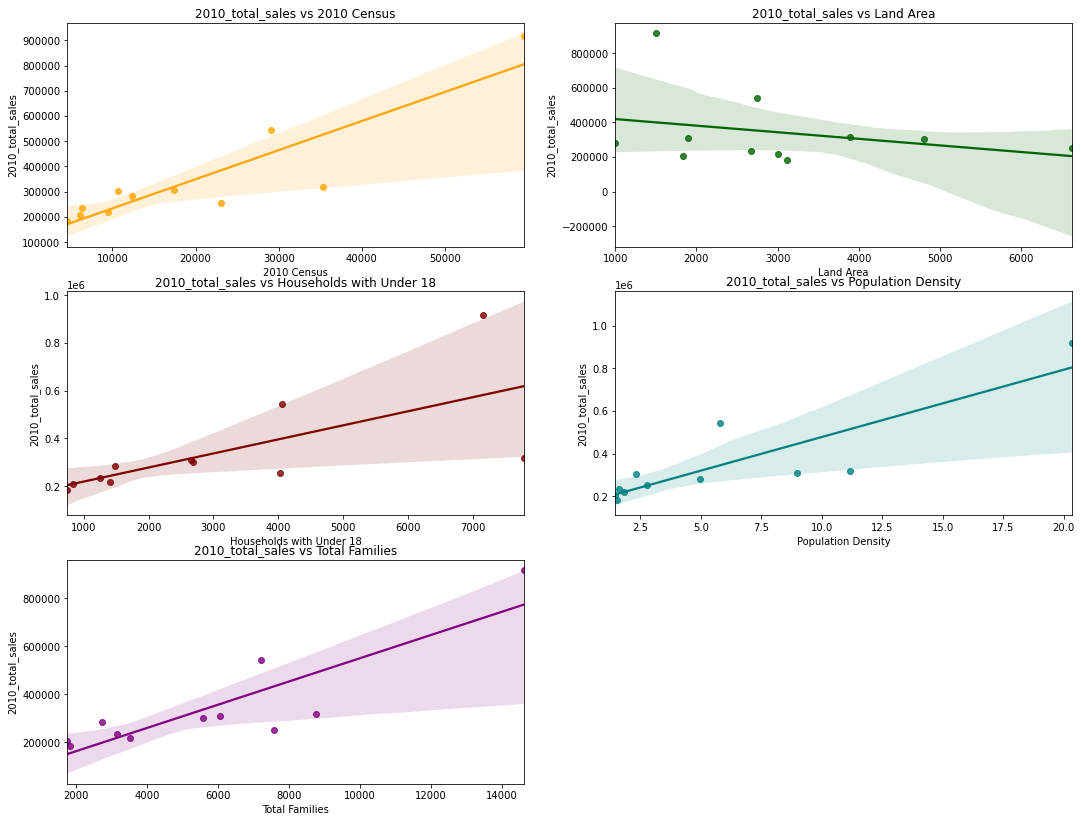

In [27]:
import seaborn as sns
i=0
plt.figure(figsize=(18, 14))
color=['darkgreen', 'maroon', 'teal', 'purple', 'blue', 'orange']
for col in demo_pop_sales.drop(['City','2010_total_sales'], axis=1):
    plt.subplot(3,2,i+1)
    sns.regplot(x=col, y='2010_total_sales',data=demo_pop_sales, color=color[i-1])
    plt.title("2010_total_sales vs " + col)
    i += 1
plt.show()

## Drop outliers

In [28]:
demo_pop_sales_outliers = demo_pop_sales.copy()
demo_pop_sales = demo_pop_sales[demo_pop_sales['City']!='Gillette']
print(len(demo_pop_sales))

10


## Feature Selection
* Correlation 
* Pvalues

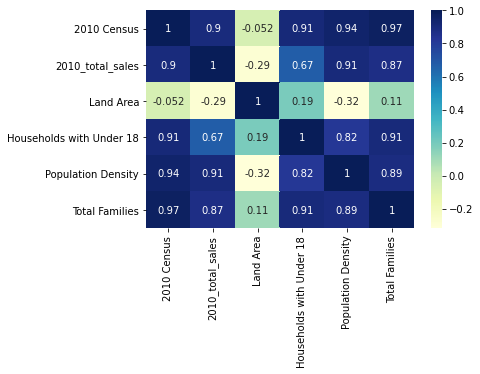

In [29]:
sns.heatmap(demo_pop_sales.drop(['City'], axis=1).corr(), cmap="YlGnBu", annot=True);

## Multicollinearity? Yes
* The population is highly correlated with the households with under 18, population density and total families
* I will be choosing land area and the census population as my variables

In [30]:
import statsmodels.api as sm
y = demo_pop_sales["2010_total_sales"]
X = demo_pop_sales.drop(['2010_total_sales', 'City'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2010_total_sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     21.00
Date:                Mon, 26 Apr 2021   Prob (F-statistic):            0.00568
Time:                        15:54:02   Log-Likelihood:                -119.87
No. Observations:                  10   AIC:                             251.7
Df Residuals:                       4   BIC:                             253.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.098e+05   8.76e+04      2.396      0.075   -3.33e+04    4.53e+05
2010 Census                  7.7486      7.998      0.969      0.388     -14.458      29.956
Land Area                  -54.7558     46.996     -1.165      0.309    -185.238      75.726
Households with Under 18   -42.5064     31.518     -1.349      0.249    -130.015      45.002
Population Density       -1.631e+04   2.64e+04     -0.618      0.570   -8.95e+04    5.69e+04
Total Families              64.2932     39.043      1.647      0.175     -44.107     172.693
==============================================================================
Omnibus:                        0.132   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.324
Skew:                           0.163   Prob(JB):                        0.851
Kurtosis:                       2.181   Cond. No.                     1.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X = demo_pop_sales[['Land Area', '2010 Census']]
y = demo_pop_sales['2010_total_sales']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2010_total_sales   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     22.52
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           0.000893
Time:                        15:54:23   Log-Likelihood:                -126.37
No. Observations:                  10   AIC:                             258.7
Df Residuals:                       7   BIC:                             259.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.109e+05   6.92e+04      3.048      0.019    4.73e+04    3.74e+05
Land Area     -30.2312     17.443     -1.733      0.127     -71.478      11.016
2010 Census    11.0304      1.728      6.383      0.000       6.944      15.116
==============================================================================
Omnibus:                        2.243   Durbin-Watson:                   2.578
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                0.417
Skew:                          -0.460   Prob(JB):                        0.812
Kurtosis:                       3.391   Cond. No.                     6.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = demo_pop_sales[['Land Area', 'Total Families']]
y = demo_pop_sales['2010_total_sales']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2010_total_sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     36.20
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           0.000203
Time:                        15:54:36   Log-Likelihood:                -124.25
No. Observations:                  10   AIC:                             254.5
Df Residuals:                       7   BIC:                             255.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.973e+05   5.64e+04      3.496      0.010    6.38e+04    3.31e+05
Land Area        -48.4249     14.184     -3.414      0.011     -81.965     -14.885
Total Families    49.1358      6.055      8.115      0.000      34.818      63.453
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.163
Skew:                          -0.818   Prob(JB):                        0.559
Kurtosis:                       2.660   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X = demo_pop_sales[['Land Area', 'Households with Under 18']]
y = demo_pop_sales['2010_total_sales']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2010_total_sales   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     6.054
Date:                Mon, 26 Apr 2021   Prob (F-statistic):             0.0298
Time:                        15:54:51   Log-Likelihood:                -131.38
No. Observations:                  10   AIC:                             268.8
Df Residuals:                       7   BIC:                             269.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.976e+05   1.07e+05      2.778      0.027    4.43e+04    5.51e+05
Land Area                  -54.0672     29.277     -1.847      0.107    -123.295      15.161
Households with Under 18    63.0917     19.440      3.245      0.014      17.123     109.061
==============================================================================
Omnibus:                        2.545   Durbin-Watson:                   2.825
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                0.269
Skew:                          -0.077   Prob(JB):                        0.874
Kurtosis:                       3.788   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
X = demo_pop_sales[['Land Area', 'Population Density']]
y = demo_pop_sales['2010_total_sales']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       2010_total_sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     16.07
Date:                Mon, 26 Apr 2021   Prob (F-statistic):            0.00242
Time:                        15:54:56   Log-Likelihood:                -127.79
No. Observations:                  10   AIC:                             261.6
Df Residuals:                       7   BIC:                             262.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.435e+05   8.75e+04      1.641      0.145   -6.33e+04     3.5e+05
Land Area              0.0785     21.180      0.004      0.997     -50.005      50.162
Population Density  3.145e+04   5848.327      5.377      0.001    1.76e+04    4.53e+04
==============================================================================
Omnibus:                        1.805   Durbin-Watson:                   2.303
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                0.687
Skew:                          -0.639   Prob(JB):                        0.709
Kurtosis:                       2.876   Cond. No.                     9.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
pop_2014 = population[['City', '2014 Estimate']]
pop_2014['2014 Estimate'] = population['2014 Estimate'].str.replace(',','').astype(int)
pop_2014.head()

City  2014 Estimate
0    Afton           1968
1    Albin            185
2   Alpine            845
3    Baggs            439
4  Bairoil            107

In [36]:
demo_pop_2014 = demographics[['City', 'Land Area']].merge(pop_2014, on='City')
demo_pop_2014.tail()

City    Land Area  2014 Estimate
94  Mountain View   165.292453           1304
95      Ten Sleep   100.792517            253
96        Worland  1294.105755           5366
97      Newcastle  1193.129216           3513
98          Upton   572.654867           1104

In [37]:
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split

X = demo_pop_sales[['Land Area','2010 Census']]
y = demo_pop_sales['2010_total_sales']

model = LinearRegression()
model.fit(X,y)
predicted_sales = model.predict(demo_pop_2014[['Land Area','2014 Estimate']])
print(len(predicted_sales))

99


In [38]:
demo_pop_2014['Predicted_Sales']= predicted_sales
demo_pop_2014.head()

City    Land Area  2014 Estimate  Predicted_Sales
0     Laramie  2513.745235          32081    488743.968793
1  Rock River   200.444000            245    207514.819758
2       Basin   543.951304           1312    208899.599564
3  Burlington   137.646214            332    210372.912837
4       Byron   252.489592            609    209956.476330

## Store Selection Criteria
* The new store should be located in a new city. That means there should be no existing stores in the new city.
* The total sales for the entire competition in the new city should be less than $500,000
* The new city where you want to build your new store must have a population over 4,000 people (based upon the 2014 US Census estimate).
* The predicted yearly sales must be over $200,000.
* The city chosen has the highest predicted sales from the predicted set.

In [39]:
demo_pop_sales_outliers.merge(demo_pop_2014, how='right', indicator=True).head()

City  2010 Census  2010_total_sales    Land Area  \
0     Laramie          NaN               NaN  2513.745235   
1  Rock River          NaN               NaN   200.444000   
2       Basin          NaN               NaN   543.951304   
3  Burlington          NaN               NaN   137.646214   
4       Byron          NaN               NaN   252.489592   

   Households with Under 18  Population Density  Total Families  \
0                       NaN                 NaN             NaN   
1                       NaN                 NaN             NaN   
2                       NaN                 NaN             NaN   
3                       NaN                 NaN             NaN   
4                       NaN                 NaN             NaN   

   2014 Estimate  Predicted_Sales      _merge  
0          32081    488743.968793  right_only  
1            245    207514.819758  right_only  
2           1312    208899.599564  right_only  
3            332    210372.912837  right_only  
4            609    209956.476330  right_only

In [40]:
new_cities_and_predicted_sales = demo_pop_sales_outliers.merge(demo_pop_2014, how='right', indicator=True) \
    .query("_merge == 'right_only'") \
        .dropna(axis=1) \
            .drop('_merge', axis=1)
new_cities_and_predicted_sales.head()

City    Land Area  2014 Estimate  Predicted_Sales
0     Laramie  2513.745235          32081    488743.968793
1  Rock River   200.444000            245    207514.819758
2       Basin   543.951304           1312    208899.599564
3  Burlington   137.646214            332    210372.912837
4       Byron   252.489592            609    209956.476330

In [41]:
sales_g_200_cities = new_cities_and_predicted_sales[new_cities_and_predicted_sales['Predicted_Sales']>200000]
sales_g_200_cities.head()

City    Land Area  2014 Estimate  Predicted_Sales
0     Laramie  2513.745235          32081    488743.968793
1  Rock River   200.444000            245    207514.819758
2       Basin   543.951304           1312    208899.599564
3  Burlington   137.646214            332    210372.912837
4       Byron   252.489592            609    209956.476330

In [42]:
competitors = competitors[['PHYSICAL CITY NAME', 'SALES VOLUME']]
competitors.columns = ['City', 'Sales']
competitors.head()

PHYSICAL CITY NAME  SALES VOLUME
0           Cheyenne        300000
1           Cheyenne        640000
2           Cheyenne             0
3           Cheyenne         81000
4            Laramie         76000

In [44]:
competitors = competitors.groupby(['City'], as_index=False).sum()
competitors

City    Sales
0         Alpine    70000
1         Casper   210000
2       Cheyenne  1021000
3        Douglas    96000
4         Dubois    55000
5       Evanston    89000
6     Evansville   210000
7       Gillette  1130000
8        Jackson   182000
9       Kemmerer    69000
10        Lander   152197
11       Laramie    76000
12  Rock Springs   990000
13      Saratoga    83000
14    Torrington   876991
15     Wheatland    77000
16       Worland   169000

In [45]:
new_competitors_cities = competitors.merge(sales_g_200_cities, how='right', indicator=True) \
    .query("_merge == 'both'") \
        .dropna(axis=1) \
            .drop('_merge', axis=1)
new_competitors_cities

City     Sales    Land Area  2014 Estimate  Predicted_Sales
0      Laramie   76000.0  2513.745235          32081    488743.968793
18    Saratoga   83000.0   976.042427           1692    200028.520510
25      Dubois   55000.0   437.073505            998    208667.103524
32  Torrington  876991.0  1599.818493           6736    236808.240810
42      Alpine   70000.0   366.598892            845    209109.986553
45    Kemmerer   69000.0  1185.264109           2732    205175.091914
52  Evansville  210000.0   215.894254           2831    235572.285080
63   Wheatland   77000.0  1430.510450           3659    207986.163523
72     Jackson  182000.0  1757.659200          10449    272992.306333
77     Worland  169000.0  1294.105755           5366    230938.683969